In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from conda_forge_tick.utils import load_graph

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [3]:
path = Path(".")
if not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

if not path.joinpath("cf-scripts").is_dir():
    !git clone https://github.com/regro/cf-scripts
    !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

In [4]:
cd cf-graph-countyfair

/home/christopher/dev/conda-forge/by-the-numbers/cf-graph-countyfair


In [5]:
gx = load_graph()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
a = 'created_at'
b = 'closed_at'

In [8]:
import datetime
import time

In [9]:
def get_datetime(s):
    return datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%SZ')

In [10]:
elapsed = []
started = []

In [11]:
for k, node in gx.nodes.items():
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and a in pr["PR"]:
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else pd.NaT
            elapsed.append((finish-start).total_seconds())

In [12]:
df = pd.DataFrame({'elapsed': elapsed, 'started': started})
df = df.set_index('started')

In [13]:
datetime.datetime.today() + pd.offsets.MonthEnd() + pd.offsets.MonthEnd()

Timestamp('2020-06-30 22:06:29.465405')

In [14]:
date_ranges = [str(x) for x in pd.date_range(np.min(started), 
                                             datetime.datetime.today() + pd.offsets.MonthEnd() + pd.offsets.MonthEnd(), 
                                             freq='M', closed='left')]

In [15]:
date_ranges

['2018-06-30 22:41:25',
 '2018-07-31 22:41:25',
 '2018-08-31 22:41:25',
 '2018-09-30 22:41:25',
 '2018-10-31 22:41:25',
 '2018-11-30 22:41:25',
 '2018-12-31 22:41:25',
 '2019-01-31 22:41:25',
 '2019-02-28 22:41:25',
 '2019-03-31 22:41:25',
 '2019-04-30 22:41:25',
 '2019-05-31 22:41:25',
 '2019-06-30 22:41:25',
 '2019-07-31 22:41:25',
 '2019-08-31 22:41:25',
 '2019-09-30 22:41:25',
 '2019-10-31 22:41:25',
 '2019-11-30 22:41:25',
 '2019-12-31 22:41:25',
 '2020-01-31 22:41:25',
 '2020-02-29 22:41:25',
 '2020-03-31 22:41:25',
 '2020-04-30 22:41:25',
 '2020-05-31 22:41:25']

In [16]:
medians = []
less_1_month = []
open_pr = []

In [17]:
hour = 1
day = 24

In [18]:
cd ..

/home/christopher/dev/conda-forge/by-the-numbers


/home/christopher/mc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/home/christopher/mc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/home/christopher/mc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

/home/christopher/mc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/home/christopher/mc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


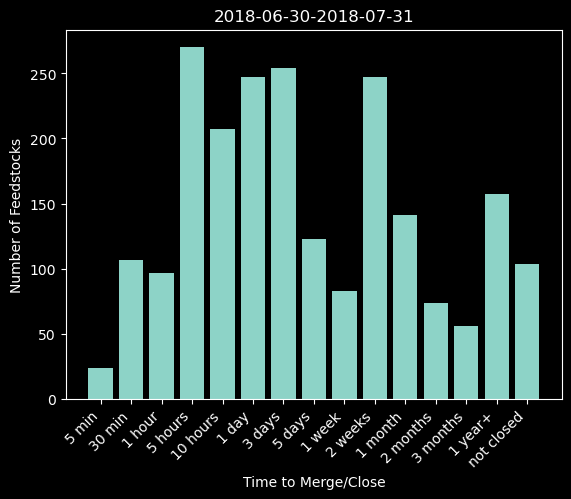

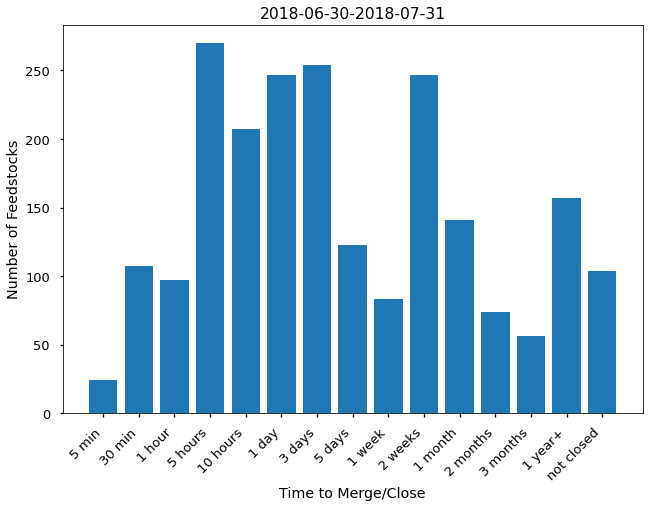

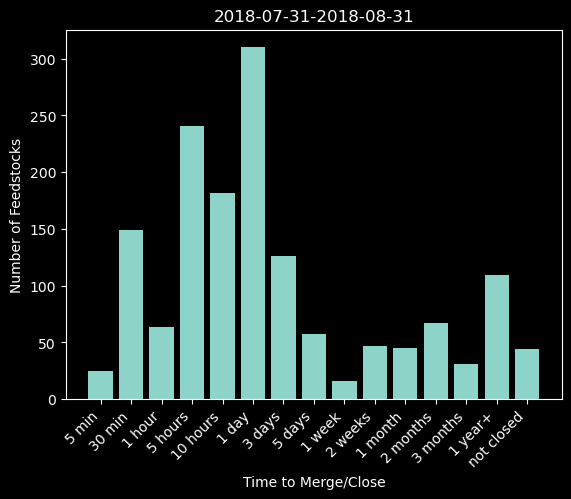

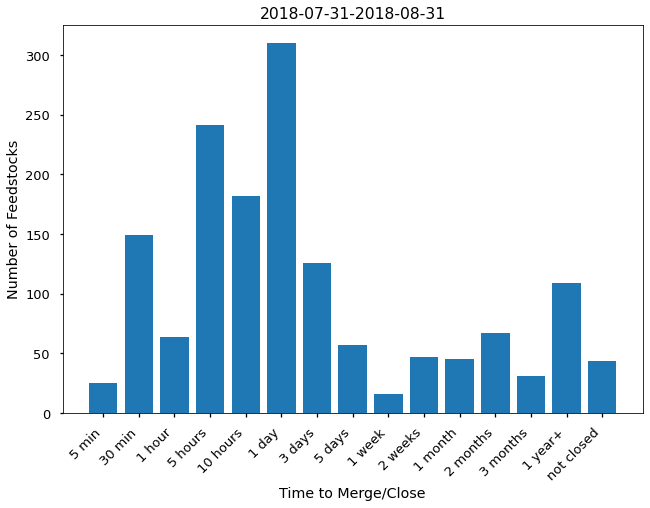

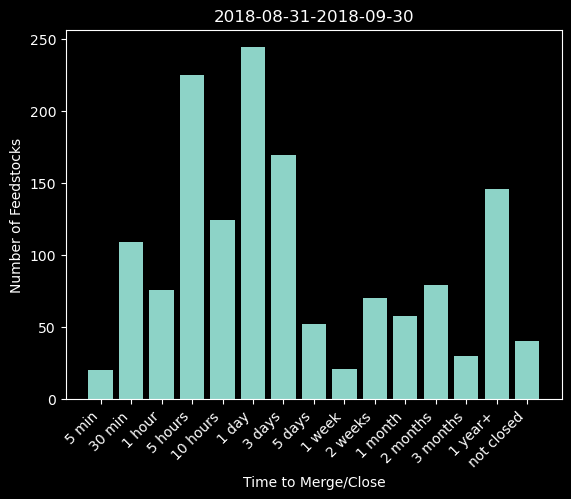

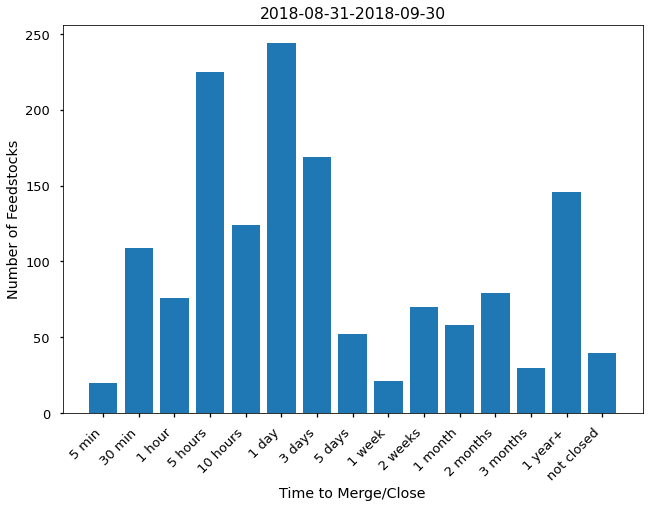

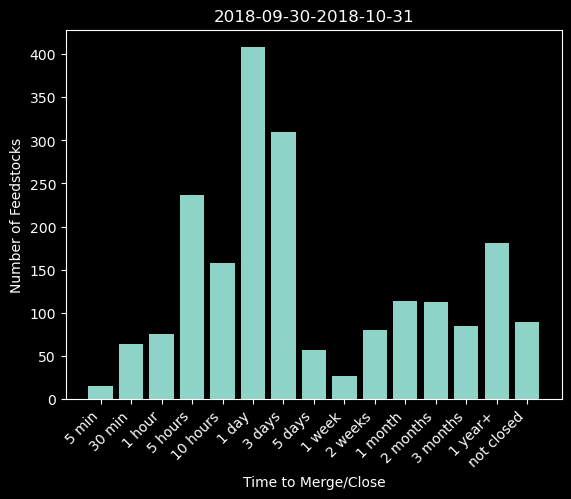

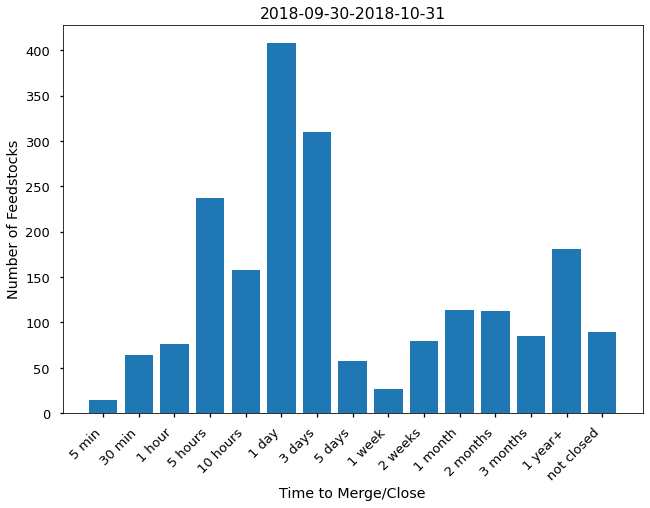

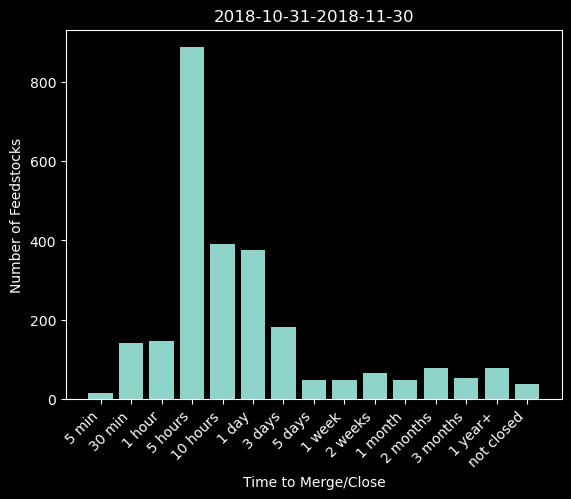

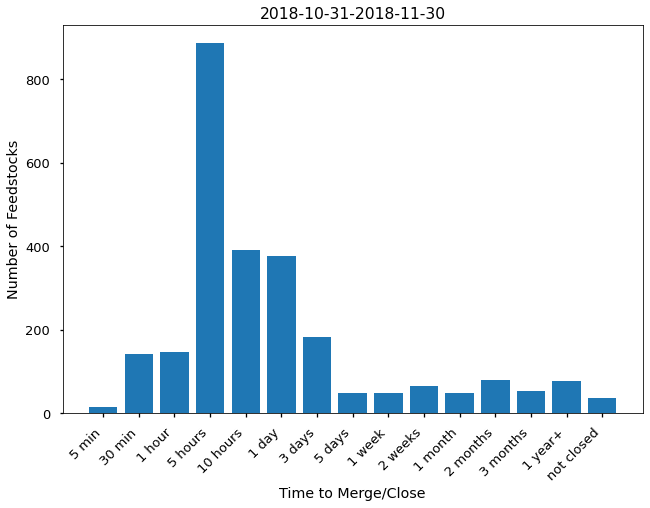

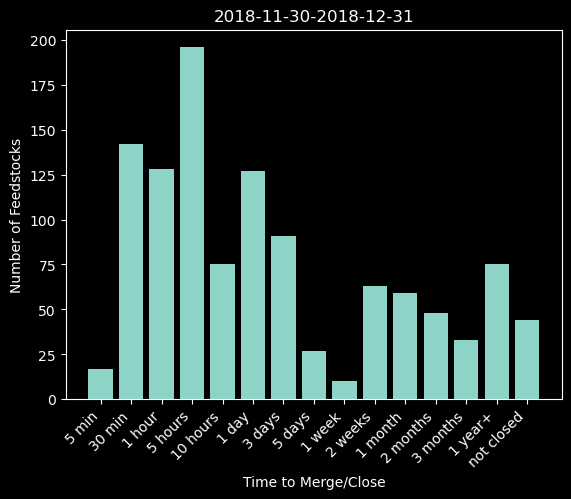

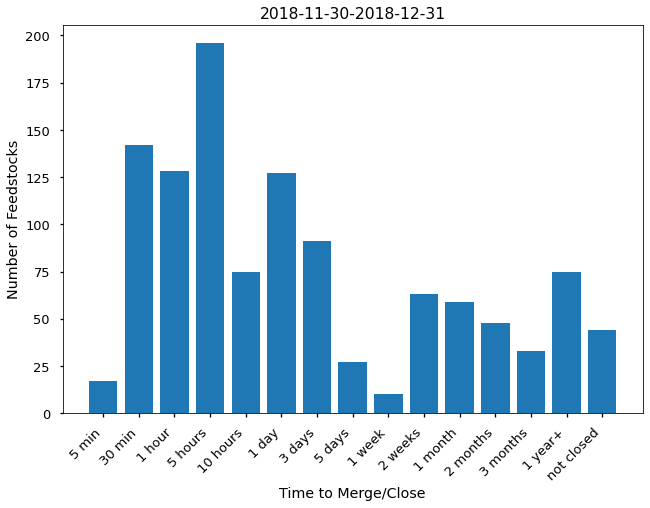

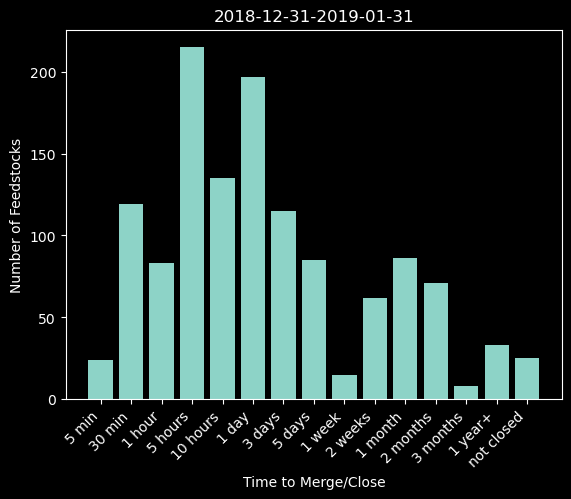

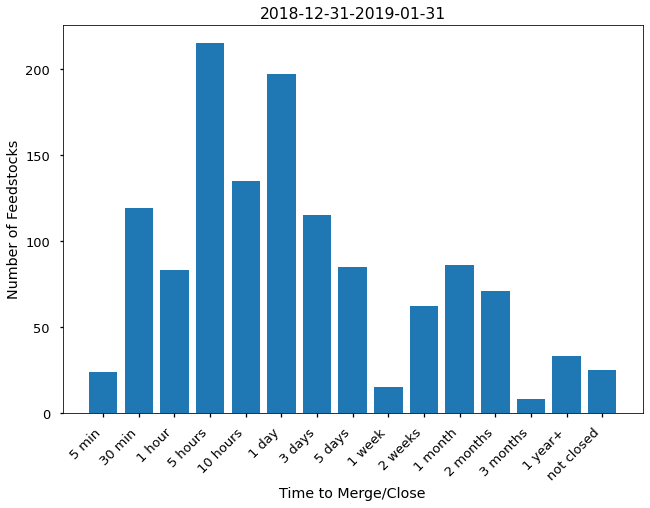

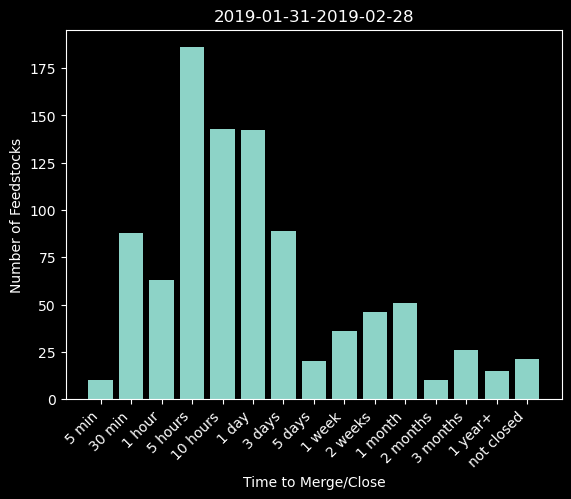

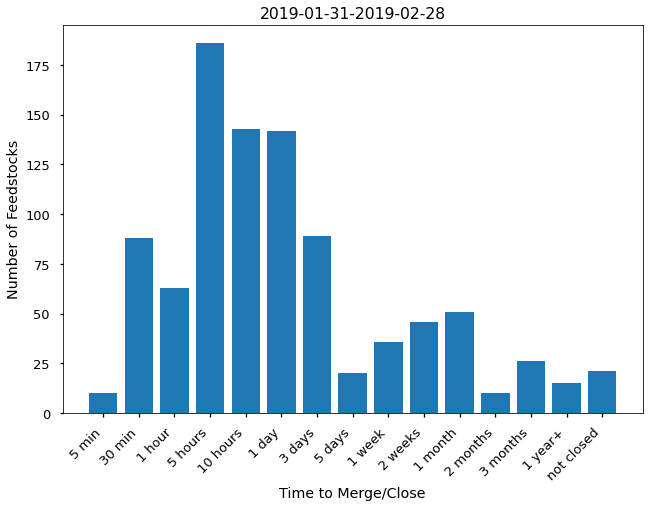

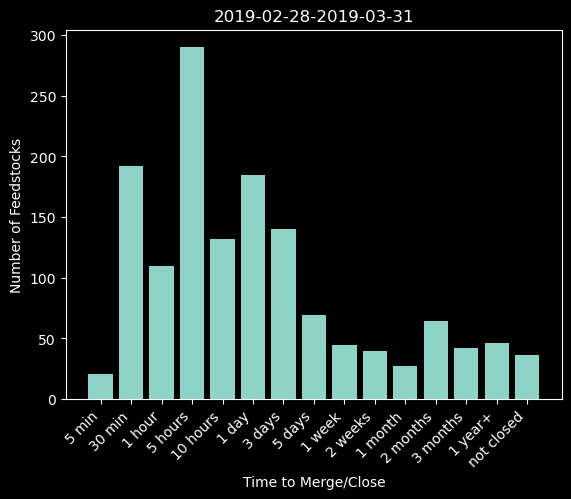

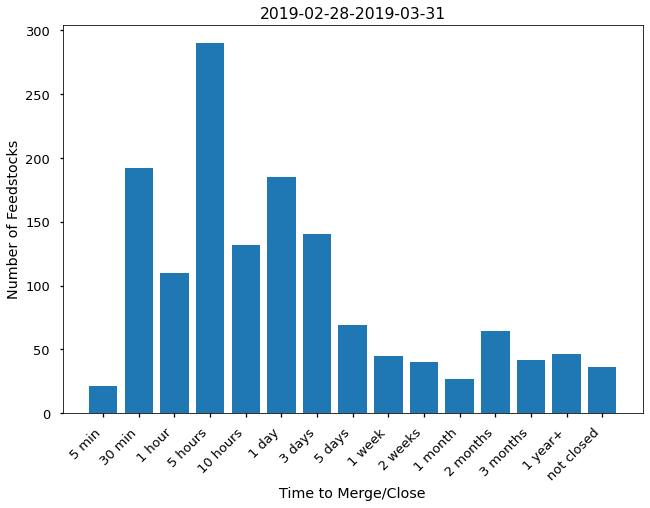

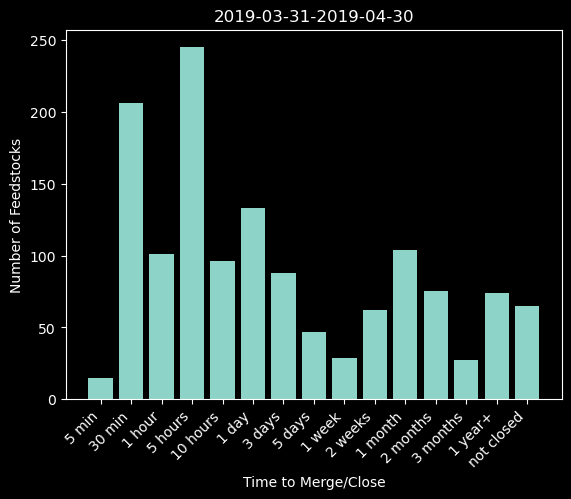

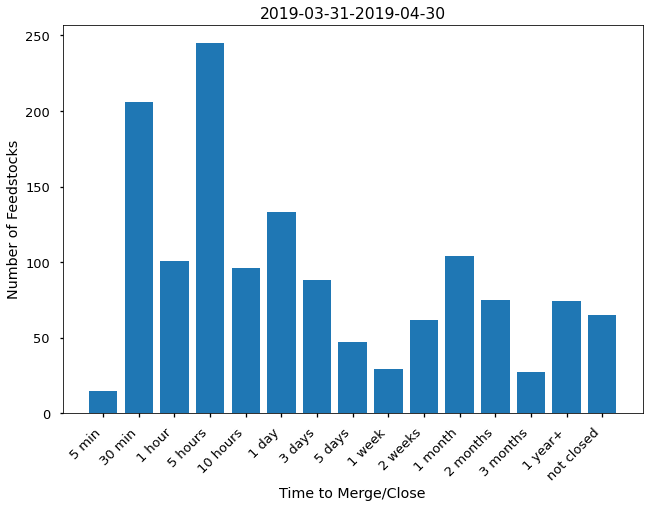

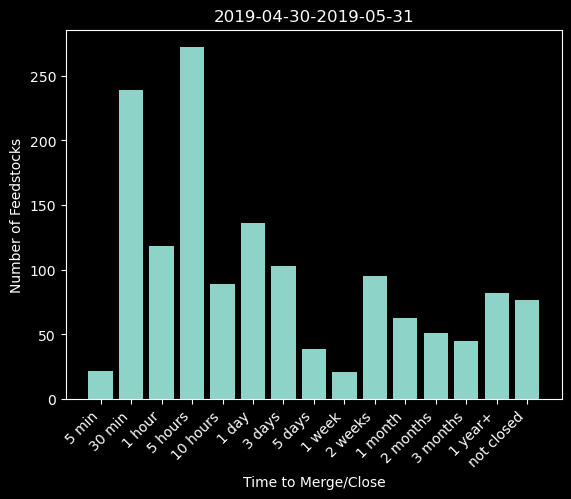

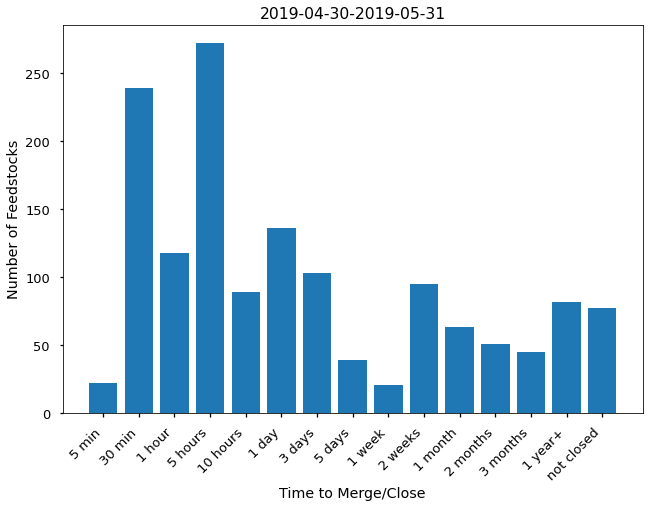

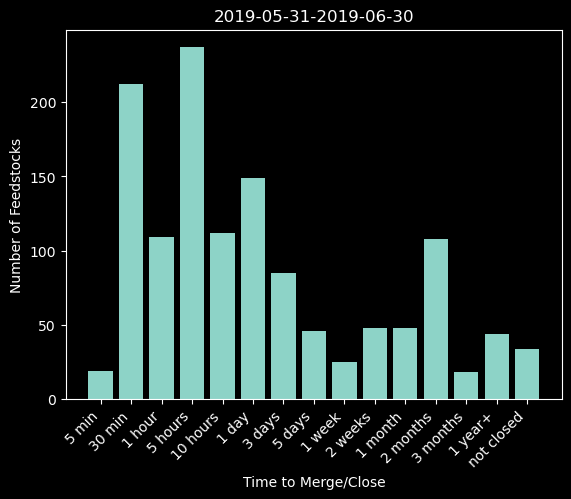

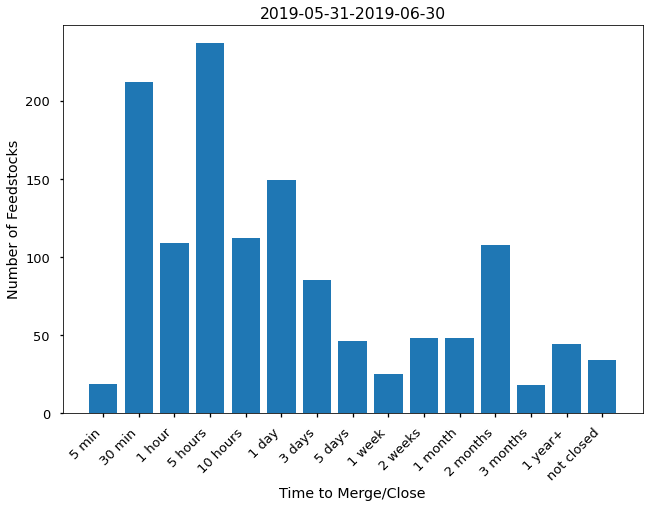

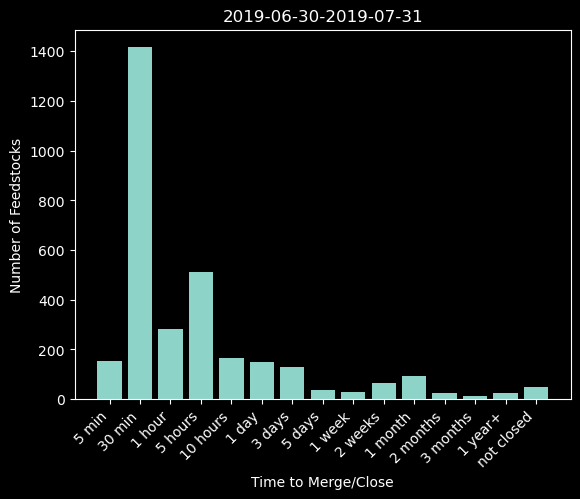

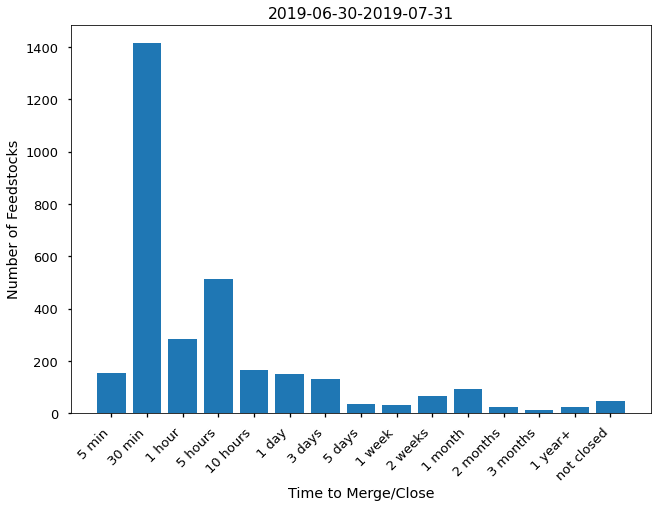

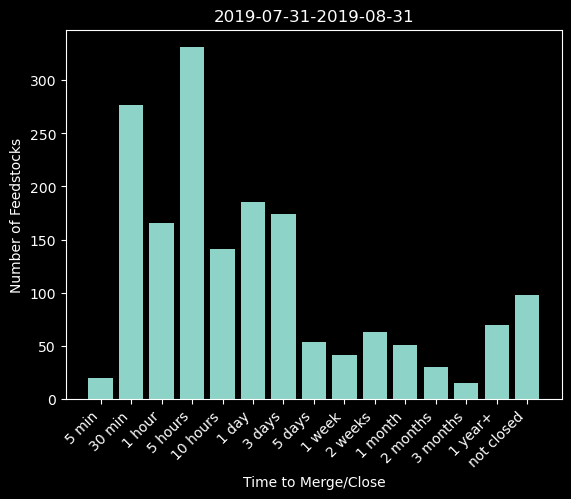

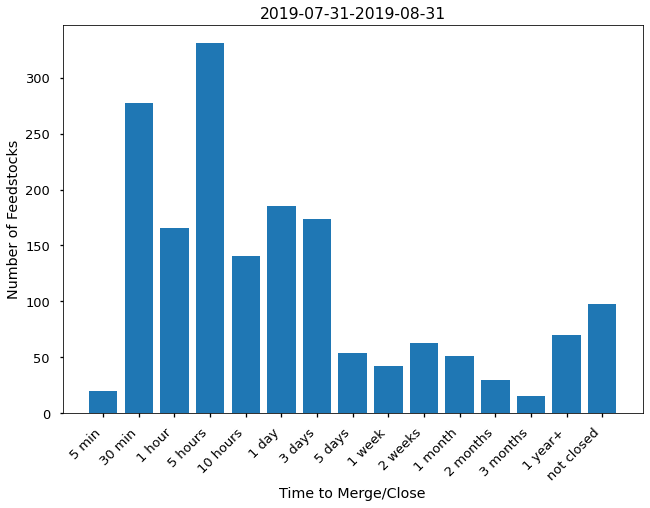

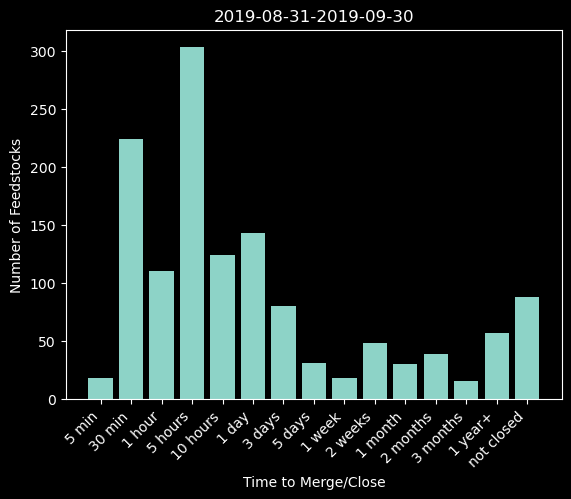

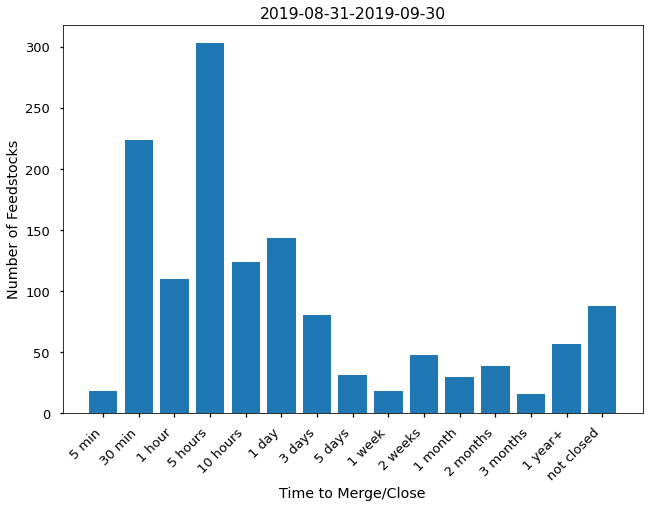

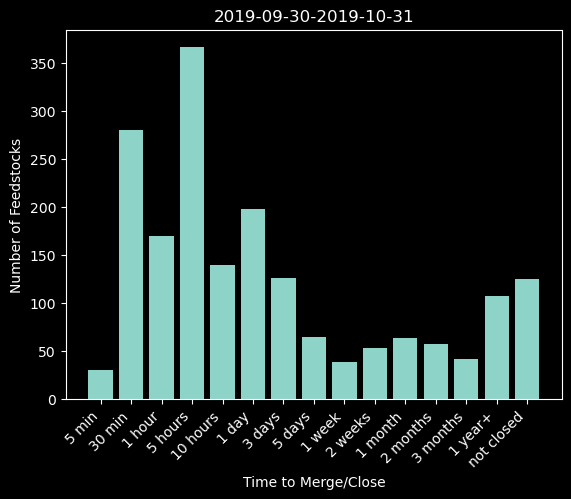

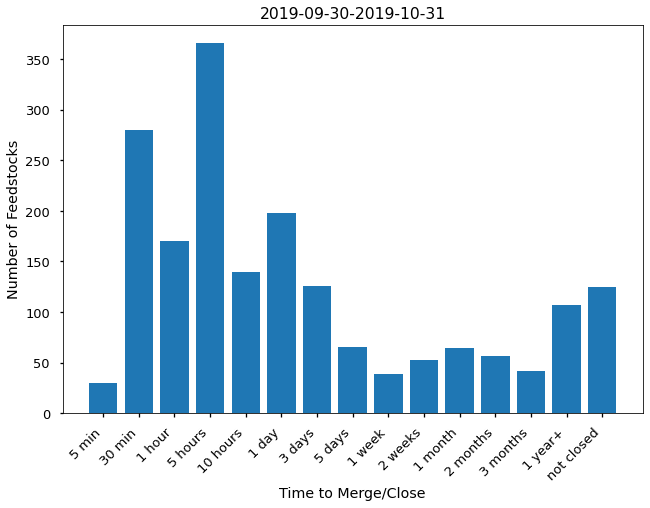

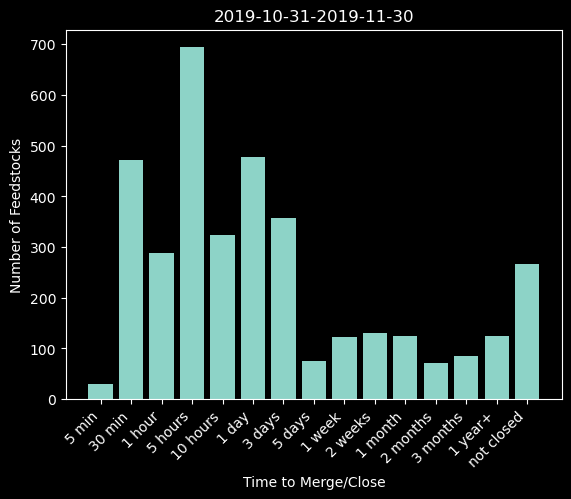

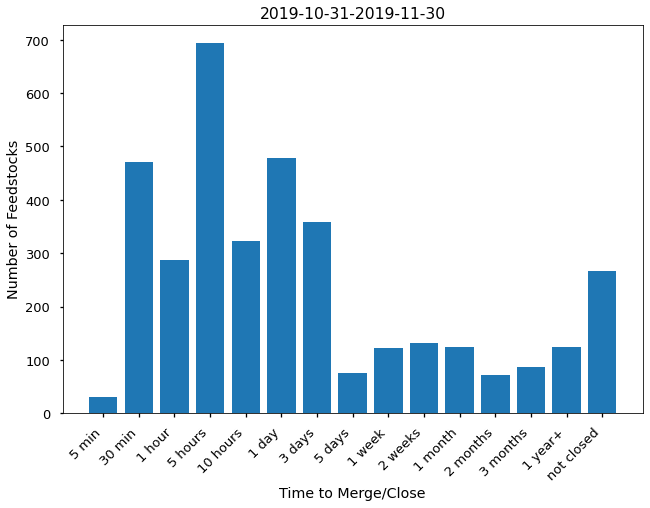

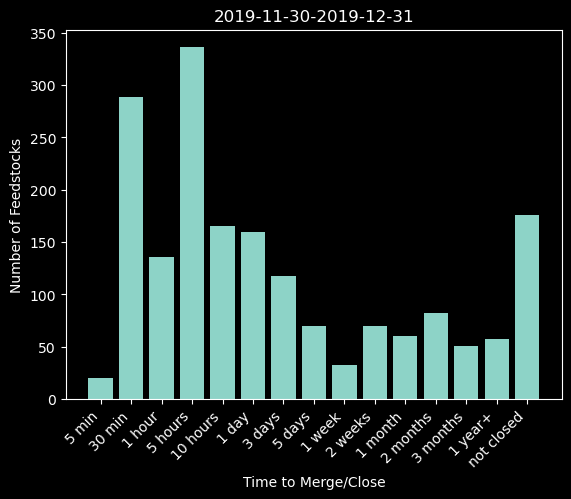

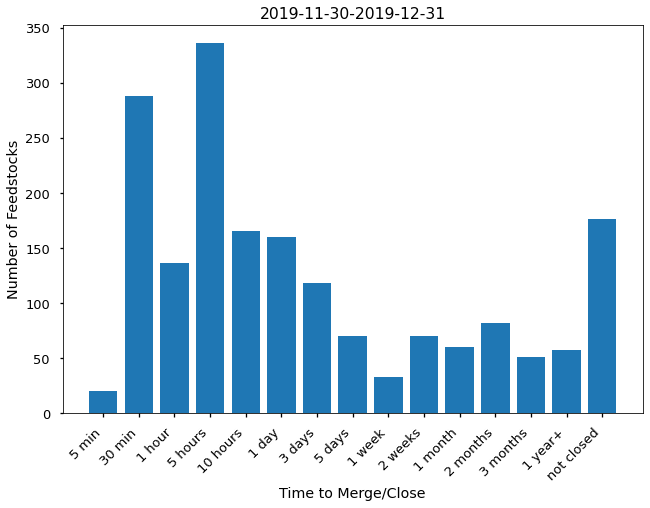

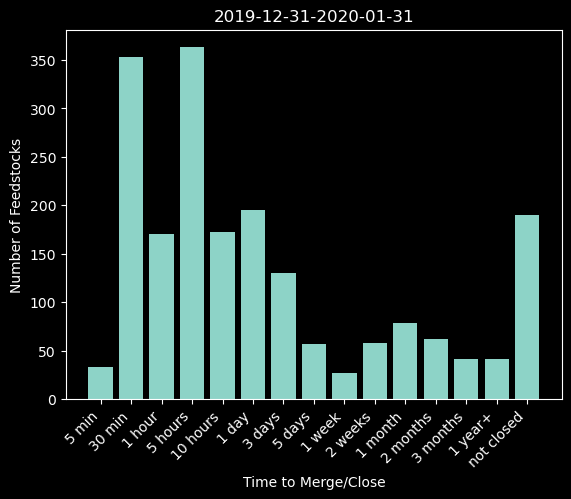

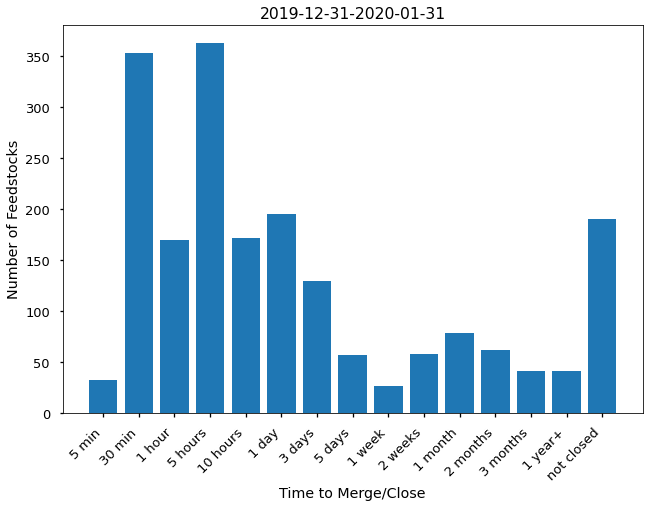

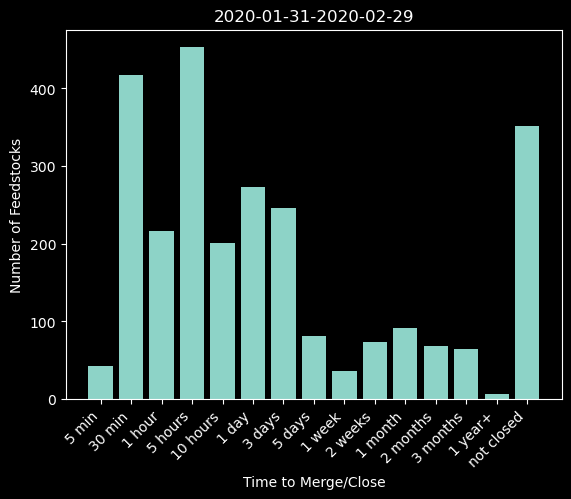

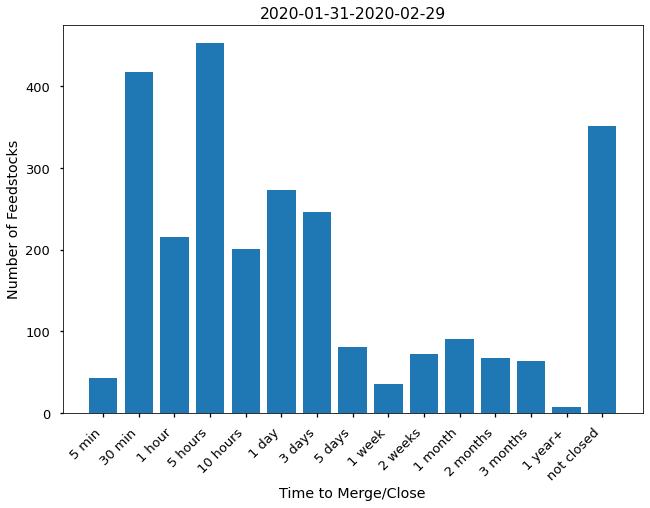

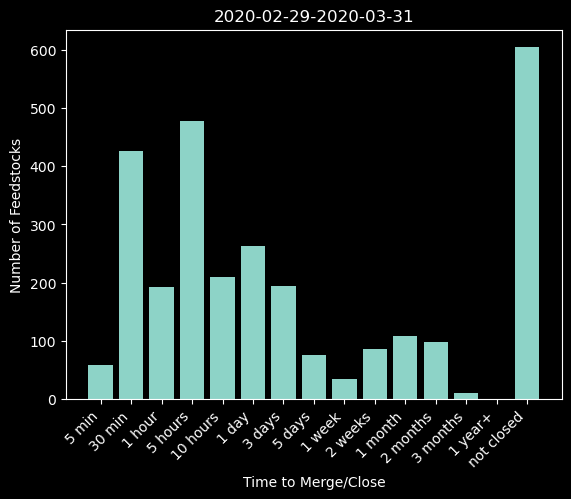

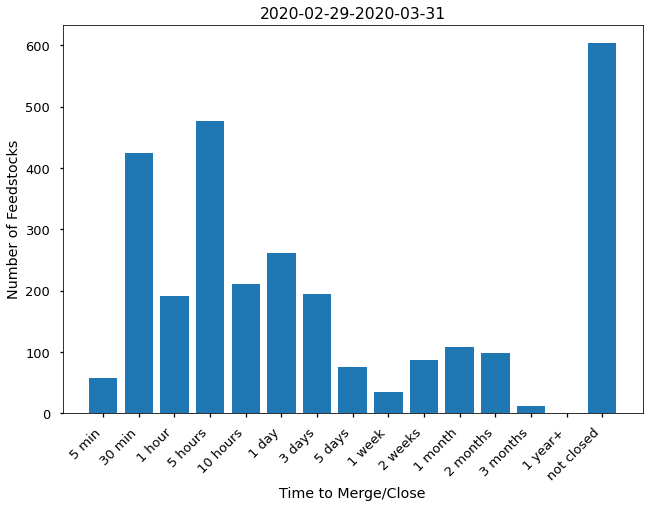

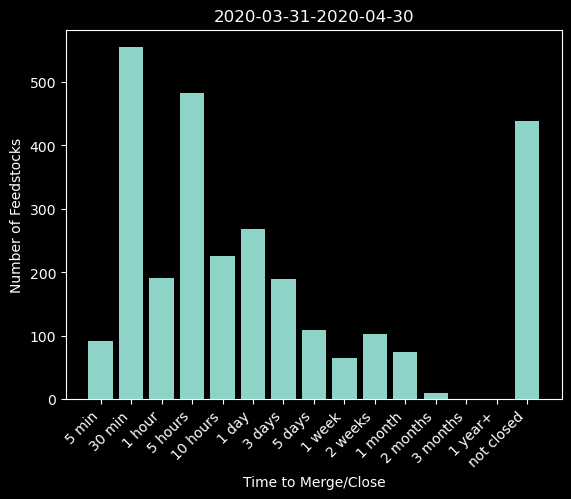

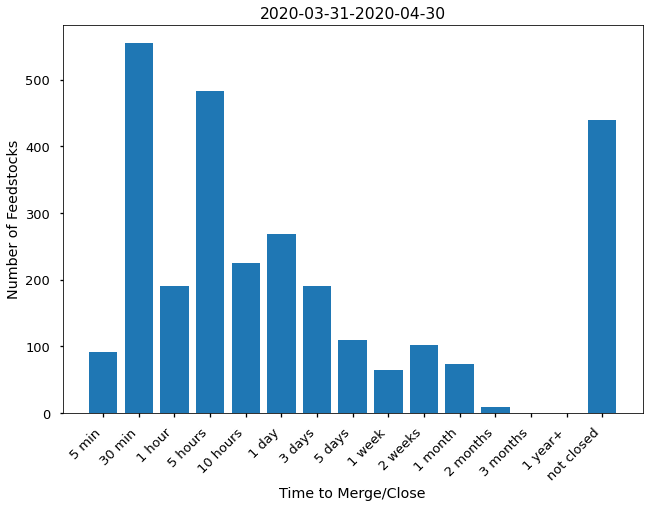

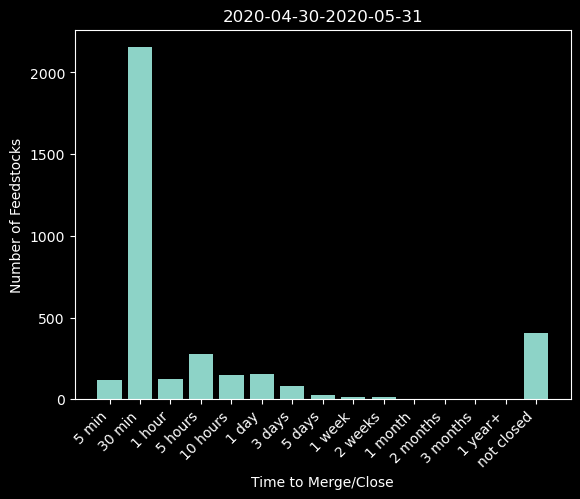

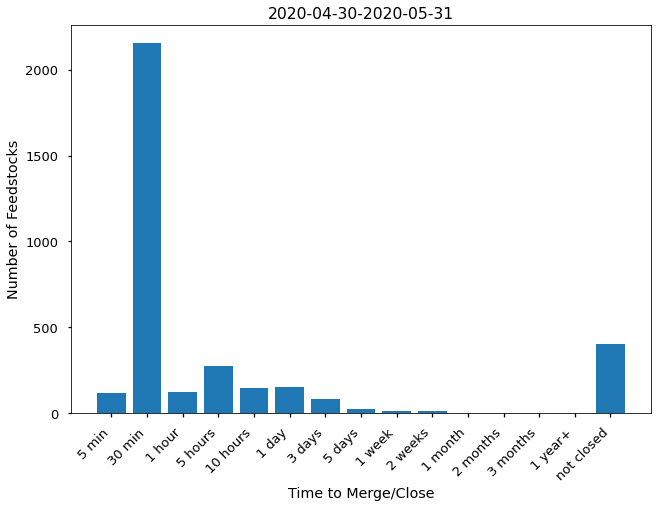

In [22]:
for i, (be, en) in enumerate(zip(date_ranges, date_ranges[1:])):
    
    nelapsed = df[be:en]['elapsed']/(60*60)
    
    medians.append(np.median(nelapsed))
    less_1_month.append(np.sum(nelapsed < 30*day) / len(nelapsed))
    open_pr.append(np.sum(np.isnan(np.asarray(nelapsed))))
    
    vals, _= np.histogram(nelapsed, [0, 5/60, 30/60, hour, 5*hour, 10*hour, day, 3*day, 5*day, 7*day, 14*day, 30*day, 60*day, 90*day, 365*day, pd.NaT])
    for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
        with plt.style.context(*context):
            fig, ax = plt.subplots()
            ax.bar(range(len(vals)), vals, tick_label=['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+', 'not closed'], )
            ax.set_xticklabels(['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+', 'not closed'], rotation=45, ha='right')
            ax.set_xlabel("Time to Merge/Close")
            ax.set_ylabel("Number of Feedstocks")
            plt.title(f'{be.split(" ")[0]}-{en.split(" ")[0]}')
            plt.savefig(f'plots/{be.split(" ")[0]}-{en.split(" ")[0]}-{"_".join(context)}.png', bbox_inches='tight', transparent=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

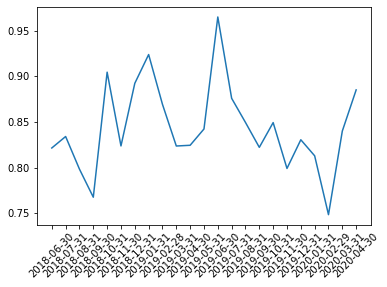

In [20]:
plt.plot([x.split(' ')[0] for x in date_ranges[:-1]], less_1_month)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

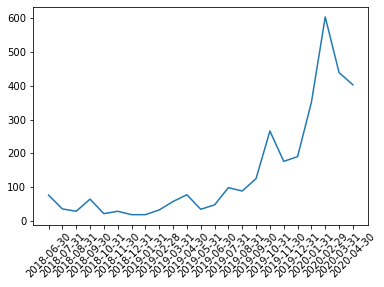

In [21]:
plt.plot([x.split(' ')[0] for x in date_ranges[:-1]], open_pr)
plt.xticks(rotation=45)

In [22]:
np.sum(np.isnan(np.asarray(elapsed)))

3287

In [23]:
vals, _= np.histogram(np.asarray(elapsed)/60/60, [0, 5/60, 30/60, hour, 5*hour, 10*hour, day, 3*day, 5*day, 7*day, 14*day, 30*day, 60*day, 90*day, 365*day])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

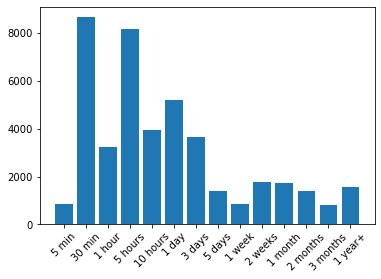

In [24]:
plt.bar(range(len(vals)), vals, tick_label=['5 min', '30 min', '1 hour', '5 hours', '10 hours', '1 day', '3 days', '5 days', '1 week', '2 weeks', '1 month', '2 months', '3 months', '1 year+'], )
plt.xticks(rotation=45)